### Parte 2: Caso Práctico de Agrupamiento

#### 4. Problema de Agrupamiento

Agruparemos países según similitudes en indicadores económicos, demográficos y sociales para:

Identificar patrones globales (ej: países desarrollados vs. en desarrollo).

Segmentar mercados para estrategias de inversión o ayuda internacional.





import libreries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

Cargar dataset

In [3]:
df = pd.read_csv('countries of the world.csv', decimal=',')

In [4]:
# Limpieza: manejo de valores faltantes y conversión de tipos
df = df.apply(lambda x: pd.to_numeric(x, errors='coerce') ) # Convertir a numérico
df.fillna(df.median(), inplace=True)  # Imputar con medianas

In [5]:
# Seleccionar features para clustering
features = ['GDP ($ per capita)', 'Literacy (%)', 'Infant mortality (per 1000 births)', 
            'Agriculture', 'Industry', 'Service']
X = df[features]

In [6]:
# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

EDA Inicial

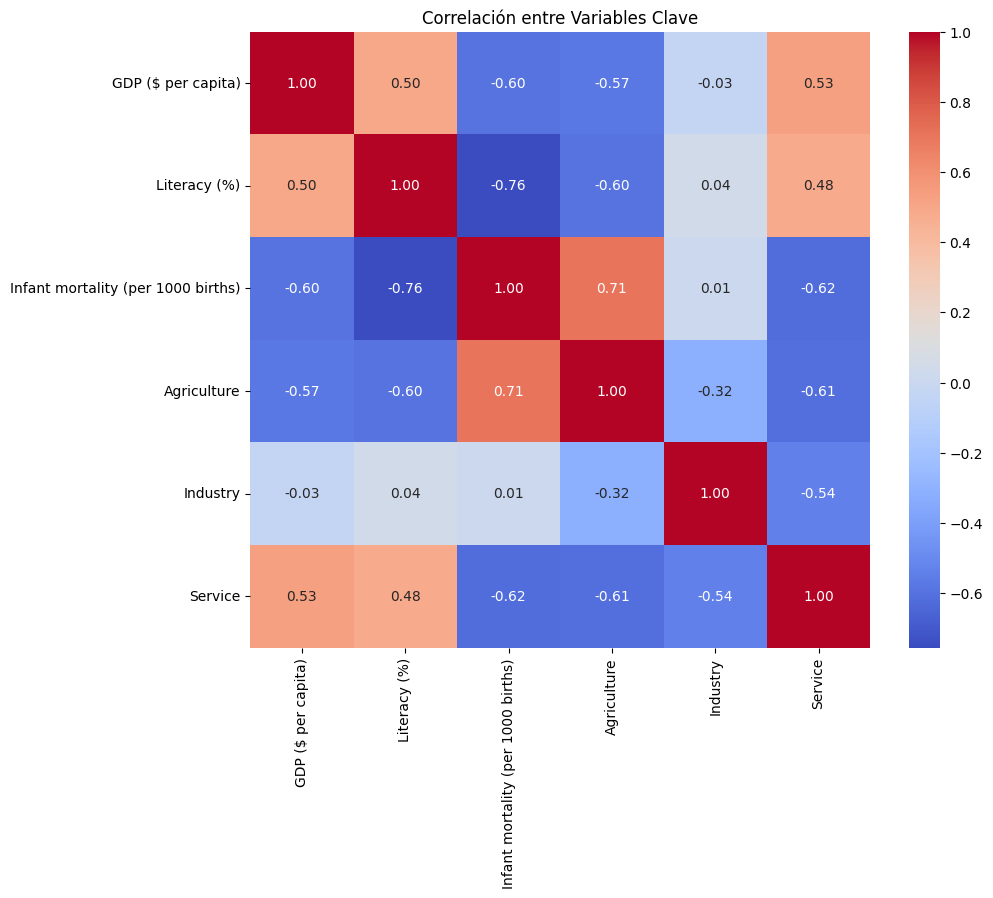

In [7]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación entre Variables Clave");


Clustering con K-Means

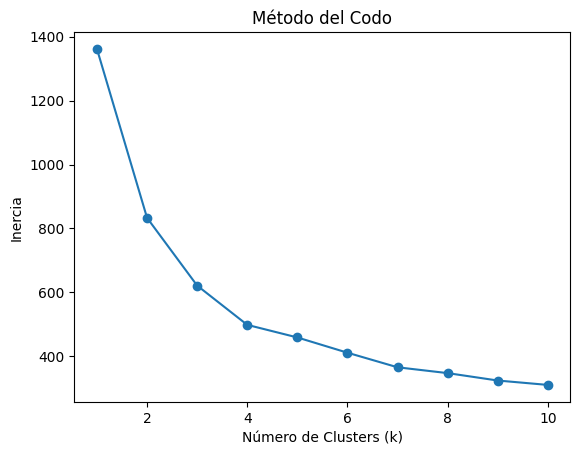

In [8]:
# Método del Codo
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo');

Aplicación de K-Means (k=4):

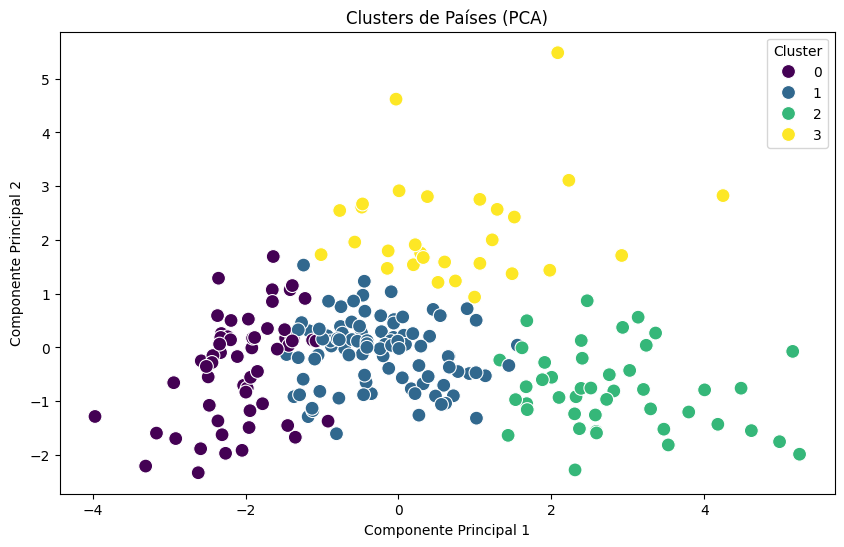

In [9]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# Visualización con PCA (reducción a 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis', s=100)
plt.title('Clusters de Países (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2');

In [10]:
# Estadísticas por cluster
cluster_stats = df.groupby('Cluster')[features].mean()
print(cluster_stats)

         GDP ($ per capita)  Literacy (%)  Infant mortality (per 1000 births)  \
Cluster                                                                         
0              23663.333333     96.810000                            6.693167   
1               5345.212766     89.792553                           26.098191   
2               1411.363636     53.668182                           86.211364   
3               7279.310345     81.644828                           47.187586   

         Agriculture  Industry   Service  
Cluster                                   
0           0.041517  0.236050  0.717633  
1           0.127883  0.266457  0.596670  
2           0.366886  0.210364  0.422909  
3           0.096862  0.535793  0.367310  


Evaluación del Modelo

In [11]:
score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {score:.2f}") 

Silhouette Score: 0.32


Visualización Avanzada

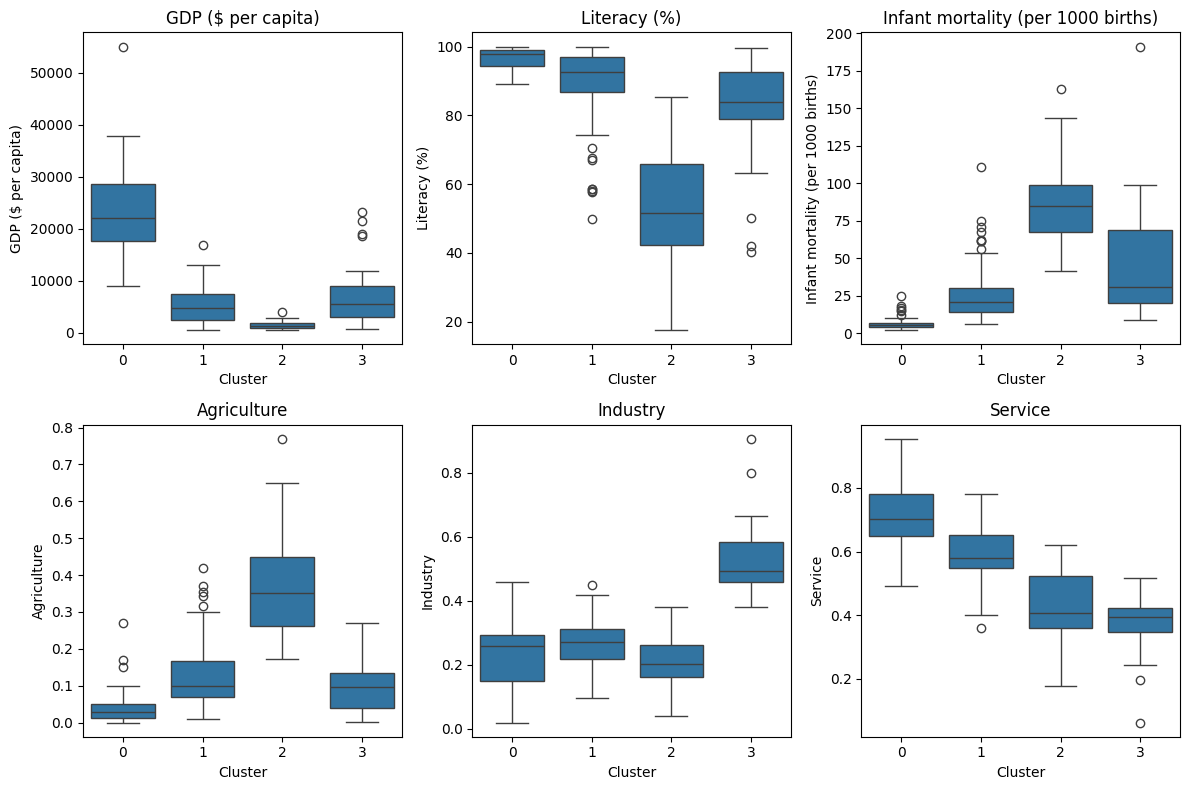

In [12]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(feature)
plt.tight_layout();

 **Conclusión de la Parte 2:**
 
El análisis de clustering con K-Means permitió clasificar los países en 4 grupos socioeconómicos distintos, revelando patrones clave en desarrollo, riqueza y condiciones de vida. Esta segmentación facilita la toma de decisiones estratégicas en políticas globales, cooperación internacional y análisis de mercado. Este clustering proporciona una base cuantitativa para entender disparidades globales y optimizar estrategias de desarrollo, comercio y cooperación. Sin embargo, debe usarse junto con análisis cualitativos para decisiones informadas.